In [1]:
machine = 'mac'
machine = 'magny'

In [2]:
from galpy.potential import NFWPotential as NFWpot
from galpy.potential import HernquistPotential as HEpot
from galpy.potential import DoubleExponentialDiskPotential as DEpot
from galpy.potential import MiyamotoNagaiPotential as MNpot
from galpy.potential import MN3ExponentialDiskPotential as MN3pot
from galpy.potential import MWPotential2014

from galpy.potential import evaluateDensities, evaluatePotentials
from galpy.potential import plotDensities
from galpy.potential import plotRotcurve
from galpy.util import bovy_conversion

import numpy as np
from scipy import optimize as opt

from astropy import units

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.mplot3d import Axes3D
import copy

from areposnap.gadget import gadget_readsnap
from areposnap.gadget_subfind import load_subfind
import calcGrid

from auriga_basics import *
from auriga_functions import *

import datetime


%matplotlib inline

In [3]:
#### path = /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/*
level = 4
if machine == 'magny':
    basedir = "/hits/universe/GigaGalaxy/level4_MHD/"
elif machine == 'mac': 
    basedir = "/Users/smilanov/Desktop/Auriga/level4/"
j = 0
for halo_number in [24]:  # range(1, 31):
    halodir = basedir+"halo_{0}/".format(halo_number)
    snappath = halodir+"output/"
    for snapnr in range(127,128,1):
        print("level   : {0}".format(level))
        print("halo    : {0}".format(halo_number))
        print("snapnr  : {0}".format(snapnr))
        print("basedir : {0}".format(basedir))
        print("halodir : {0}".format(halodir))
        print("snappath: {0}\n".format(snappath))
        s, sf = eat_snap_and_fof(level, halo_number, snapnr, snappath, loadonlytype=[0,1,2,3,4,5], 
            haloid=0, galradfac=0.1, verbose=True) 

        # Clean negative and zero values of gmet to avoid RuntimeErrors
        # later on (e.g. dividing by zero)
        s.data['gmet'] = np.maximum( s.data['gmet'], 1e-40 )
     

level   : 4
halo    : 24
snapnr  : 127
basedir : /hits/universe/GigaGalaxy/level4_MHD/
halodir : /hits/universe/GigaGalaxy/level4_MHD/halo_24/
snappath: /hits/universe/GigaGalaxy/level4_MHD/halo_24/output/

[ 34.42281723  33.16259384  37.29567337]
Found 1783163 stars.
Rotated pos.
Rotated bfld.
Rotated vel.

galrad  : 0.02408556640148163
redshift: 2.220446049250313e-16
time    : 0.9999999999999998
center  : [ 0.  0.  0.]



In [4]:
mask =  np.where( (s.halo == 0) & (s.r() < 2.*s.galrad) & (s.r() > 0.) )
m_cum, m_enc, rbins_Mpc = enclosed_mass(s.mass[mask], s.r()[mask], nbins = 41) 
mask =  np.where( (s.halo == 0) & (s.r() < 2.*s.galrad) & (s.r() > 0.) )
m_cum, m_enc, rbins_Mpc = enclosed_mass(s.mass[mask], s.r()[mask], nbins = 41) 

In [5]:
iall, = np.where( (s.r() < 2.*s.galrad) & (s.r() > 0.) )

mask = iall
(x_kpc, y_kpc, z_kpc), (vx_kms, vy_kms, vz_kms), rxyz_kpc, rxy_kpc = get_cartesian_vectors(s, sf, mask)
(R_kpc, phi, z_kpc), (vR_kms, vphi, vz_kms) = get_cylindrical_vectors(s, sf, mask)


(x, y, z), (vx, vy, vz), rxyz, rxy = get_cartesian_vectors(s, sf, mask)
(R, phi, z), (vR, vphi, vz) = get_cylindrical_vectors(s, sf, mask)

rho, Rbin, z, vol = fitting_dens(s.mass[mask][np.abs(z_kpc > -50.) & np.abs(z_kpc <50.)], R_kpc[np.abs(z_kpc > -50.) & np.abs(z_kpc <50.)], z_kpc[np.abs(z_kpc > -50.) & np.abs(z_kpc <50.)], nbins = 41)
#rho, R, z, vol = fitting_dens(s)


Mass, radius and height given as input.


In [6]:
mask = np.where( (s.type == 4) & (np.abs(s.pos[:, 0] < 0.001)) & (s.r() < s.galrad) )
(R_kpc, phi, z_kpc), (vR_kms, vphi_kms, vz_kms) = get_cylindrical_vectors(s, sf, mask)

/home/extmilan/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1537: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')



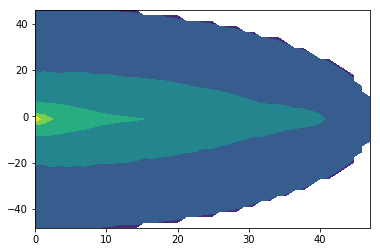

In [7]:
plt.contourf(Rbin, z, rho, norm=LogNorm(vmin=1e-6, vmax=1))

/home/extmilan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide

[  4.00000000e-01   1.00000000e-01   8.00000000e-01   3.00000000e+00
   1.00000000e-01   2.00000000e+02]
inf
0.9
[  4.00000000e-01   1.00000000e-01   8.00000000e-01   3.00000000e+00
   1.00000000e-01   2.00000000e+02]
inf
0.9
[  4.00000015e-01   1.00000000e-01   8.00000000e-01   3.00000000e+00
   1.00000000e-01   2.00000000e+02]
inf
0.9
/home/extmilan/anaconda3/lib/python3.6/site-packages/scipy/optimize/slsqp.py:63: RuntimeWarning: invalid value encountered in subtract
  jac[i] = (func(*((x0+dx,)+args)) - f0)/epsilon

[  4.00000000e-01   1.00000015e-01   8.00000000e-01   3.00000000e+00
   1.00000000e-01   2.00000000e+02]
inf
0.9
[  4.00000000e-01   1.00000000e-01   8.00000015e-01   3.00000000e+00
   1.00000000e-01   2.00000000e+02]
inf
0.900000014901
[  4.00000000e-01   1.00000000e-01   8.00000000e-01   3.00000001e+00
   1.00000000e-01   2.00000000e+

ValueError: Objective function must return a scalar

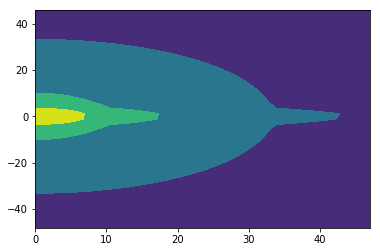

In [11]:
def galpy_fitting(a_mp, b_mp, n_mp, a_nfw, n_nfw, v0,\
                  R = None, z = None, r0 = None):    #a_he, n_he,
    
    # stell sicher dass n_mp + n_nfw + n_he = 1, zb mit 
    #n_he = 1. - (n_mp + n_nfw)
    mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp)
    nfwp = NFWpot(a = a_nfw, normalize = n_nfw)
    #hep = HEpot(a = a_he, normalize = n_he)
    
    pot = [mp, nfwp]#, hep]
    densi = np.zeros([len(z), len(R)])
    for ii, zjj in enumerate(z):
        for jj, Rii in enumerate(R):
            densi[ii, jj] = evaluateDensities(pot, Rii/r0, zjj/r0) #* bovy_conversion.dens_in_msolpc3(v0,r0) * 10.
    
    plt.contourf(R, z, densi, norm=LogNorm(vmin=np.min(densi), vmax=np.max(densi)))

    return densi



def RMS(x, R, z, N, rho, r0):
    a_mp, b_mp, n_mp, a_nfw, n_nfw, v0 = x[0], x[1], x[2], x[3], x[4], x[5]#, x[6], x[7] a_he, n_he
    ydata = rho
    ymodel = galpy_fitting(a_mp, b_mp, n_mp, a_nfw, n_nfw,  v0, R, z, r0) * bovy_conversion.dens_in_msolpc3(v0,r0) #a_he, n_he,
    RMS = np.sum((ydata - ymodel)**2/(ydata**2))
    print(x)
    print(RMS)
    print(n_mp + n_nfw)
    print(datetime.datetime.now().time())
    return RMS

a_mp = 0.4 #0.5 
b_mp = 0.1 #0.0375 
n_mp = 0.8 #0.6  
a_nfw = 3. #4.5 
n_nfw = 0.1 #0.35 
a_he = 6. # 0.6 / 8. 
n_he = 0.1 
v0 = 200. #220


x0 = (a_mp, b_mp, n_mp,  a_nfw , n_nfw , v0) # a_he, n_he, 

bounds = ((1e-3, None), (1e-3, None), (1e-3, 0.999), (1e-3, None), (1e-3, 0.999), (1e-3, None)) # (1e-3, None), (1e-3, 0.999),n_he

r0 = 8.
N = len(Rbin)

cons = ({'type': 'eq', 'fun': lambda x:  1. - (x[2] + x[4] )})
        
res = opt.minimize(RMS, x0 = x0, args= (Rbin, z, N, rho, r0), bounds = bounds, constraints = cons)



In [ ]:

a_mp = 0.5 
b_mp = 0.1# 0.0375 
n_mp = 0.25  
a_nfw = 3#4.5 
n_nfw = 0.25 
a_he = 0.6 / 8. 
n_he = 0.25 

res


In [ ]:
a_mp, b_mp, n_mp = res.x[0], res.x[1], res.x[2]
a_nfw , n_nfw = res.x[3]  , res.x[4]
a_he, n_he = res.x[5],  res.x[6]

In [ ]:
a_mp = 0.5 
b_mp = 0.0375 
n_mp = 0.6  
a_nfw = 4.5 
n_nfw = 0.35 
a_he = 0.6 / 8. 
n_he = 0.05 
mp = MNpot(a = a_mp, b = b_mp, normalize = n_mp, ro = r0, vo = v0)
nfwp = NFWpot(a = a_nfw, normalize = n_nfw, ro = r0, vo = v0)
hep = HEpot(a = a_he, normalize = 1-(n_mp+n_nfw), ro = r0, vo = v0)
    
pot = [mp,nfwp,hep]



In [ ]:
dens_final = galpy_fitting(a_mp, b_mp, n_mp, a_nfw , n_nfw, a_he, n_he, R= R, z= z)

In [ ]:
plotDensities(pot,nrs=101,nzs=101, log = True)

In [ ]:
rho.shape

In [ ]:
dens_final

In [ ]:
dens_final.shape

In [ ]:
print(rho)

In [ ]:
rho.shape

In [ ]:
plt.plot(dens_final[0, :], dens_final[1, :], '.')

In [ ]:

X, Y = np.meshgrid(R,z)
plt.contourf(X,Y, rho, norm=LogNorm(vmin=1e-6, vmax=1))
plt.show()
plt.contourf(X,Y,dens_final, norm=LogNorm(vmin=1e-6, vmax=1))

In [ ]:
print(rho)

In [ ]:
plt.imshow(rho, norm=LogNorm(vmin=1e-6, vmax=1))
plt.show()
plt.imshow(dens_final, norm=LogNorm(vmin=1e-6, vmax=1))

In [ ]:
np.max(rho)

In [ ]:
# Additional trials which didn't work out 

### CURVE_FIT might give problems since there are some bool args that do not need a fit. 
### Also having R and z as input values instead of just r might cause problems. 
### Think of that or first try minimize with RMS method

# scipy.optimize.curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, 
# check_finite=True, bounds=(-inf, inf), method=None, jac=None, **kwargs)[source]

#xdata = s.r()
# check in which direction ravel goes over the arrays to calculate xdata in the irght way
'''
rho, rho_arr_real, rho_arr_mean, Rbins, zbins, volbins = dens(s)
ydata = np.ravel(rho)
xdata = np.zeros(len(Rbins), len(zbins))
for ii, Rii in enumerate(Rbins):
    for jj, zjj in enumerate(zbins):
        xdata[ii,jj] = np.sqrt(Rii ** 2 + zjj **2)
            
popt, pcov = opt.curve_fit(galpy_fitting, np.ravel(xdata), ydata, sigma = np.ravel(volbins), absolute_sigma = True)
'''